In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
cust = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Supply Chain/dim_customers.csv')
date = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Supply Chain/dim_date.csv')
target = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Supply Chain/dim_targets_orders.csv')
order = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Supply Chain/fact_order_lines.csv')
agg = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Supply Chain/fact_orders_aggregate.csv')

####Now performing data cleaning and data prepration

In [ ]:
cust.head()

,customer_id,customer_name,city
0,789201,Rel Fresh,Surat
1,789202,Rel Fresh,Ahmedabad
2,789203,Rel Fresh,Vadodara
3,789301,Expression Stores,Surat
4,789303,Expression Stores,Vadodara


In [ ]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    35 non-null     int64 
 1   customer_name  35 non-null     object
 2   city           35 non-null     object
dtypes: int64(1), object(2)
memory usage: 968.0+ bytes


In [ ]:
cust.isnull().sum()

customer_id      0
customer_name    0
city             0
dtype: int64

In [ ]:
cust['customer_id'].duplicated().sum()

0

In [ ]:
date.head()

,date,mmm_yy,week_no
0,01-Apr-22,01-Apr-22,W 14
1,03-Apr-22,01-Apr-22,W 15
2,04-Apr-22,01-Apr-22,W 15
3,05-Apr-22,01-Apr-22,W 15
4,06-Apr-22,01-Apr-22,W 15


In [ ]:
date.isnull().sum()

date       0
mmm_yy     0
week_no    0
dtype: int64

In [ ]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     183 non-null    object
 1   mmm_yy   183 non-null    object
 2   week_no  183 non-null    object
dtypes: object(3)
memory usage: 4.4+ KB


In [ ]:
date['date'] = pd.to_datetime(date['date'])

In [ ]:
date['week_no'] = date['week_no'].str.split(' ',n=1).str[1]

In [ ]:
date['week_no'] = date['week_no'].astype(int)

In [ ]:
date.head()

,date,mmm_yy,week_no
0,2022-04-01,01-Apr-22,14
1,2022-04-03,01-Apr-22,15
2,2022-04-04,01-Apr-22,15
3,2022-04-05,01-Apr-22,15
4,2022-04-06,01-Apr-22,15


In [ ]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     183 non-null    datetime64[ns]
 1   mmm_yy   183 non-null    object        
 2   week_no  183 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 4.4+ KB


In [ ]:
target.head()

,customer_id,ontime_target%,infull_target%,otif_target%
0,789201,87,81,70
1,789202,85,81,69
2,789203,92,76,70
3,789301,89,78,69
4,789303,88,78,69


In [ ]:
target.isnull().sum()

customer_id       0
ontime_target%    0
infull_target%    0
otif_target%      0
dtype: int64

In [ ]:
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   customer_id     35 non-null     int64
 1   ontime_target%  35 non-null     int64
 2   infull_target%  35 non-null     int64
 3   otif_target%    35 non-null     int64
dtypes: int64(4)
memory usage: 1.2 KB


In [ ]:
order.head()

,order_id,order_placement_date,customer_id,product_id,order_qty,agreed_delivery_date,actual_delivery_date,delivery_qty,In Full,On Time,On Time In Full
0,FMR34203601,"Tuesday, March 1, 2022",789203,25891601,110,"Friday, March 4, 2022","Friday, March 4, 2022",110,1,1,1
1,FMR32320302,"Tuesday, March 1, 2022",789320,25891203,347,"Wednesday, March 2, 2022","Wednesday, March 2, 2022",347,1,1,1
2,FMR33320501,"Tuesday, March 1, 2022",789320,25891203,187,"Thursday, March 3, 2022","Thursday, March 3, 2022",150,0,1,0
3,FMR34220601,"Tuesday, March 1, 2022",789220,25891203,235,"Friday, March 4, 2022","Friday, March 4, 2022",235,1,1,1
4,FMR33703603,"Tuesday, March 1, 2022",789703,25891203,176,"Thursday, March 3, 2022","Thursday, March 3, 2022",176,1,1,1


In [ ]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57096 entries, 0 to 57095
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   order_id              57096 non-null  object
 1   order_placement_date  57096 non-null  object
 2   customer_id           57096 non-null  int64 
 3   product_id            57096 non-null  int64 
 4   order_qty             57096 non-null  int64 
 5   agreed_delivery_date  57096 non-null  object
 6   actual_delivery_date  57096 non-null  object
 7   delivery_qty          57096 non-null  int64 
 8   In Full               57096 non-null  int64 
 9   On Time               57096 non-null  int64 
 10  On Time In Full       57096 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 4.8+ MB


In [ ]:
order['order_placement_date'] = pd.to_datetime(order['order_placement_date'], format='%A, %B %d, %Y')

In [ ]:
order.head()

,order_id,order_placement_date,customer_id,product_id,order_qty,agreed_delivery_date,actual_delivery_date,delivery_qty,In Full,On Time,On Time In Full
0,FMR34203601,2022-03-01,789203,25891601,110,"Friday, March 4, 2022","Friday, March 4, 2022",110,1,1,1
1,FMR32320302,2022-03-01,789320,25891203,347,"Wednesday, March 2, 2022","Wednesday, March 2, 2022",347,1,1,1
2,FMR33320501,2022-03-01,789320,25891203,187,"Thursday, March 3, 2022","Thursday, March 3, 2022",150,0,1,0
3,FMR34220601,2022-03-01,789220,25891203,235,"Friday, March 4, 2022","Friday, March 4, 2022",235,1,1,1
4,FMR33703603,2022-03-01,789703,25891203,176,"Thursday, March 3, 2022","Thursday, March 3, 2022",176,1,1,1


In [ ]:
order['order_placement_day'] = order['order_placement_date'].apply(lambda x:x.strftime('%A'))

In [ ]:
order.head()

,order_id,order_placement_date,customer_id,product_id,order_qty,agreed_delivery_date,actual_delivery_date,delivery_qty,In Full,On Time,On Time In Full,order_placement_day
0,FMR34203601,2022-03-01,789203,25891601,110,"Friday, March 4, 2022","Friday, March 4, 2022",110,1,1,1,Tuesday
1,FMR32320302,2022-03-01,789320,25891203,347,"Wednesday, March 2, 2022","Wednesday, March 2, 2022",347,1,1,1,Tuesday
2,FMR33320501,2022-03-01,789320,25891203,187,"Thursday, March 3, 2022","Thursday, March 3, 2022",150,0,1,0,Tuesday
3,FMR34220601,2022-03-01,789220,25891203,235,"Friday, March 4, 2022","Friday, March 4, 2022",235,1,1,1,Tuesday
4,FMR33703603,2022-03-01,789703,25891203,176,"Thursday, March 3, 2022","Thursday, March 3, 2022",176,1,1,1,Tuesday


In [ ]:
order['agreed_delivery_date'] = pd.to_datetime(order['agreed_delivery_date'], format='%A, %B %d, %Y')

In [ ]:
order['agreed_delivery_day'] = order['agreed_delivery_date'].apply(lambda x:x.strftime('%A'))

In [ ]:
order['actual_delivery_date'] = pd.to_datetime(order['actual_delivery_date'], format='%A, %B %d, %Y')

In [ ]:
order['actual_delivery_day'] = order['actual_delivery_date'].apply(lambda x: x.strftime('%A'))

In [ ]:
order.head()

,order_id,order_placement_date,customer_id,product_id,order_qty,agreed_delivery_date,actual_delivery_date,delivery_qty,In Full,On Time,On Time In Full,order_placement_day,agreed_delivery_day,actual_delivery_day
0,FMR34203601,2022-03-01,789203,25891601,110,2022-03-04,2022-03-04,110,1,1,1,Tuesday,Friday,Friday
1,FMR32320302,2022-03-01,789320,25891203,347,2022-03-02,2022-03-02,347,1,1,1,Tuesday,Wednesday,Wednesday
2,FMR33320501,2022-03-01,789320,25891203,187,2022-03-03,2022-03-03,150,0,1,0,Tuesday,Thursday,Thursday
3,FMR34220601,2022-03-01,789220,25891203,235,2022-03-04,2022-03-04,235,1,1,1,Tuesday,Friday,Friday
4,FMR33703603,2022-03-01,789703,25891203,176,2022-03-03,2022-03-03,176,1,1,1,Tuesday,Thursday,Thursday


In [ ]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57096 entries, 0 to 57095
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   order_id              57096 non-null  object        
 1   order_placement_date  57096 non-null  datetime64[ns]
 2   customer_id           57096 non-null  int64         
 3   product_id            57096 non-null  int64         
 4   order_qty             57096 non-null  int64         
 5   agreed_delivery_date  57096 non-null  datetime64[ns]
 6   actual_delivery_date  57096 non-null  datetime64[ns]
 7   delivery_qty          57096 non-null  int64         
 8   In Full               57096 non-null  int64         
 9   On Time               57096 non-null  int64         
 10  On Time In Full       57096 non-null  int64         
 11  order_placement_day   57096 non-null  object        
 12  agreed_delivery_day   57096 non-null  object        
 13  actual_delivery_

In [ ]:
order.isnull().sum()

order_id                0
order_placement_date    0
customer_id             0
product_id              0
order_qty               0
agreed_delivery_date    0
actual_delivery_date    0
delivery_qty            0
In Full                 0
On Time                 0
On Time In Full         0
order_placement_day     0
agreed_delivery_day     0
actual_delivery_day     0
dtype: int64

In [ ]:
agg.head()

,order_id,customer_id,order_placement_date,on_time,in_full,otif
0,FMR32103503,789103,01-Mar-22,1,0,0
1,FMR34103403,789103,01-Mar-22,1,0,0
2,FMR32103602,789103,01-Mar-22,1,0,0
3,FMR33103602,789103,01-Mar-22,1,0,0
4,FMR33103401,789103,01-Mar-22,1,0,0


In [ ]:
agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31729 entries, 0 to 31728
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   order_id              31729 non-null  object
 1   customer_id           31729 non-null  int64 
 2   order_placement_date  31729 non-null  object
 3   on_time               31729 non-null  int64 
 4   in_full               31729 non-null  int64 
 5   otif                  31729 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.5+ MB


In [ ]:
agg['order_placement_date'] = pd.to_datetime(agg['order_placement_date'])

In [ ]:
agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31729 entries, 0 to 31728
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   order_id              31729 non-null  object        
 1   customer_id           31729 non-null  int64         
 2   order_placement_date  31729 non-null  datetime64[ns]
 3   on_time               31729 non-null  int64         
 4   in_full               31729 non-null  int64         
 5   otif                  31729 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 1.5+ MB


In [ ]:
agg.head()

,order_id,customer_id,order_placement_date,on_time,in_full,otif
0,FMR32103503,789103,2022-03-01,1,0,0
1,FMR34103403,789103,2022-03-01,1,0,0
2,FMR32103602,789103,2022-03-01,1,0,0
3,FMR33103602,789103,2022-03-01,1,0,0
4,FMR33103401,789103,2022-03-01,1,0,0


####Basic cleaning is done. Like data type change, null & duplicate value check, day name extract


###Performing EDA now

##### Customers count by city.

In [ ]:
cust['city'].value_counts()

Ahmedabad    12
Vadodara     12
Surat        11
Name: city, dtype: int64

In [ ]:
order.describe()

,customer_id,product_id,order_qty,delivery_qty,In Full,On Time,On Time In Full
count,57096.000000,5.709600e+04,57096.000000,57096.000000,57096.000000,57096.000000,57096.000000
mean,789427.216005,2.589135e+07,235.164215,227.146508,0.659608,0.711171,0.479543
std,224.254353,1.707018e+02,141.001784,137.109465,0.473845,0.453222,0.499586
min,789101.000000,2.589110e+07,20.000000,16.000000,0.000000,0.000000,0.000000
25%,789220.000000,2.589120e+07,111.000000,106.000000,0.000000,0.000000,0.000000
50%,789420.000000,2.589130e+07,207.000000,200.000000,1.000000,1.000000,0.000000
75%,789603.000000,2.589150e+07,361.000000,347.000000,1.000000,1.000000,1.000000
max,789903.000000,2.589160e+07,500.000000,500.000000,1.000000,1.000000,1.000000


###### Order in-full rate stands at 65%, with on-time delivery at 71%, while the OTIF rate is at 47%, indicating room for improvement in ensuring complete and timely order deliveries

([<matplotlib.axis.XTick at 0x7eeb88264310>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

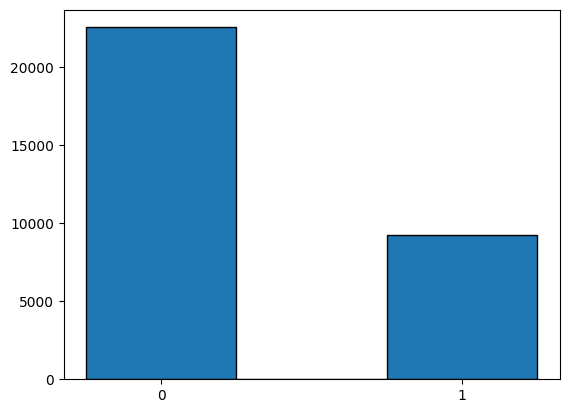

In [ ]:
plt.hist(agg['otif'], bins=[0,0.5,1,1.5], edgecolor='black', align='left')
plt.plot()
plt.xticks([0, 1])


([<matplotlib.axis.XTick at 0x7eeb8703b970>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

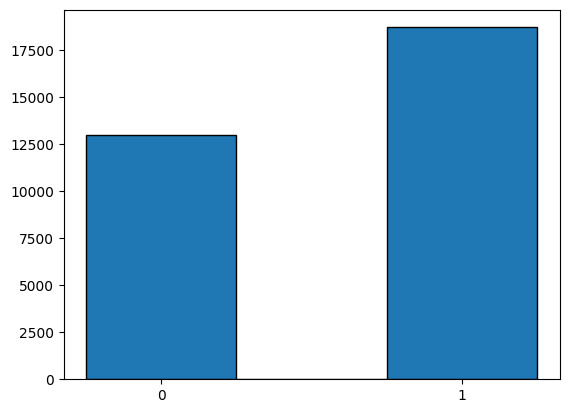

In [ ]:
plt.hist(agg['on_time'], bins=[0,0.5,1,1.5], edgecolor='black', align='left')
plt.plot()
plt.xticks([0, 1])


([<matplotlib.axis.XTick at 0x7eeb874664a0>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

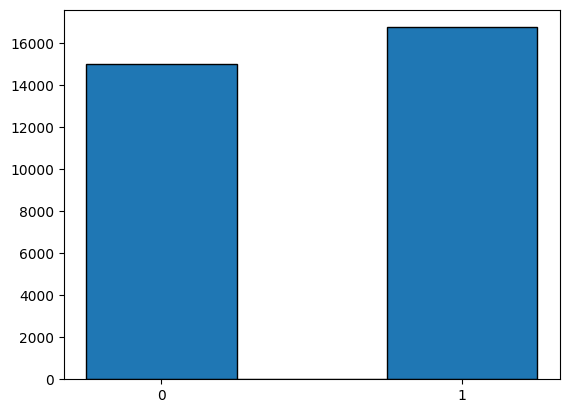

In [ ]:
plt.hist(agg['in_full'], bins=[0,0.5,1,1.5], edgecolor='black', align='left')
plt.plot()
plt.xticks([0, 1])


In [ ]:
cust.to_csv('cust.csv')
date.to_csv('date.csv')
target.to_csv('target.csv')
order.to_csv('order.csv')
agg.to_csv('aggregate.csv')